In [1]:
from rxnmapper import RXNMapper
from rdkit import Chem
from rdkit.Chem import AllChem
import re
import warnings
import copy

## In this repo, the heavy-atom-mapped reaction are generated according to rxnmapper
#####  rxnmapper: https://github.com/rxn4chemistry/rxnmapper.
## There are two ways to map hydrogen atoms and heavy atoms for the tools which just can map heavy atoms.

### 1. Replacing the hydrogen atom with special heavy atoms. After mapping, repalce these special atoms back.

In [2]:
rxn_mapper = RXNMapper()

Some weights of the model checkpoint at /home/y_liu/.cache/Python-Eggs/rxnmapper-0.1.4-py3.7.egg-tmp/rxnmapper/models/transformers/albert_heads_8_uspto_all_1310k were not used when initializing AlbertModel: ['predictions.dense.bias', 'predictions.decoder.bias', 'predictions.bias', 'predictions.decoder.weight', 'predictions.dense.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/y_liu/anaconda3/envs/rmg_env/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver

In [3]:
RDKIT_SMILES_PARSER_PARAMS = Chem.SmilesParserParams()
def str_to_mol(string: str, explicit_hydrogens: bool = True) -> Chem.Mol:

    if string.startswith('InChI'):
        mol = Chem.MolFromInchi(string, removeHs=not explicit_hydrogens)
    else:
        # Set params here so we don't remove hydrogens with atom mapping
        RDKIT_SMILES_PARSER_PARAMS.removeHs = not explicit_hydrogens
        mol = Chem.MolFromSmiles(string, RDKIT_SMILES_PARSER_PARAMS)

    if explicit_hydrogens:
        #return mol
        return Chem.AddHs(mol)
    else:
        return Chem.RemoveHs(mol)
def treatment(reactions, pre = False, post = False):
    if post == False:
        reaction_list = reactions.split('>')
        reactants_mol = str_to_mol(reaction_list[0])
        for a in reactants_mol.GetAtoms():
            a.SetAtomMapNum(0)
        products_mol = str_to_mol(reaction_list[2])
        for a in products_mol.GetAtoms():
            a.SetAtomMapNum(0)
        new_reactions = Chem.MolToSmiles(reactants_mol) + '>>' + Chem.MolToSmiles(products_mol)
        
        #replace H by other symbol
        if pre == False and post == False:
            return new_reactions
        elif pre == True and post == False:
            if '2H' not in new_reactions:
                return new_reactions.replace('[H]', '[2H]')
            elif 'F' not in new_reactions:
                return new_reactions.replace('[H]', '[F]')
            elif 'Cl' not in new_reactions:
                return new_reactions.replace('[H]', '[Cl]')
            elif 'Br' not in new_reactions:
                return new_reactions.replace('[H]', '[Br]')
            elif 'I' not in new_reactions:
                return new_reactions.replace('[H]', '[I]')
            else:
                print('There are no Hs replaced')
    elif pre == False and post == True:
            if '2H' in reactions:
                return reactions.replace('[2H', '[H')
            if 'F' in reactions:
                return reactions.replace('F', 'H')
            elif 'Cl' in reactions:
                return reactions.replace('Cl', 'H')
            elif 'Br' in reactions:
                return reactions.replace('Br', 'H')
            elif 'I' in reactions:
                return reactions.replace('I', 'H')
            else:
                print('There are no Hs replaced')
    else:
        print('Failed to replace')

**********Correct reactants and products******************


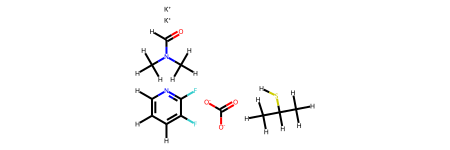

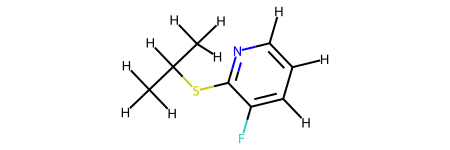

************************************************************
['O=C([O-])[O-].[2H]C(=O)N(C([2H])([2H])[2H])C([2H])([2H])[2H].[2H]SC([2H])(C([2H])([2H])[2H])C([2H])([2H])[2H].[2H]c1nc(F)c(F)c([2H])c1[2H].[K+].[K+]>>[2H]c1nc(SC([2H])(C([2H])([2H])[2H])C([2H])([2H])[2H])c(F)c([2H])c1[2H]']
[{'mapped_rxn': 'F[c:4]1[n:3][c:2]([2H:1])[c:20]([2H:21])[c:18]([2H:19])[c:16]1[F:17].O=C([O-])[O-].[2H]C(=O)N(C([2H])([2H])[2H])C([2H])([2H])[2H].[2H][S:5][C:6]([2H:7])([C:8]([2H:9])([2H:10])[2H:11])[C:12]([2H:13])([2H:14])[2H:15].[K+].[K+]>>[2H:1][c:2]1[n:3][c:4]([S:5][C:6]([2H:7])([C:8]([2H:9])([2H:10])[2H:11])[C:12]([2H:13])([2H:14])[2H:15])[c:16]([F:17])[c:18]([2H:19])[c:20]1[2H:21]', 'confidence': 0.20796488957321435}]
<class 'dict'>
F[c:4]1[n:3][c:2]([H:1])[c:20]([H:21])[c:18]([H:19])[c:16]1[F:17].O=C([O-])[O-].[H]C(=O)N(C([H])([H])[H])C([H])([H])[H].[H][S:5][C:6]([H:7])([C:8]([H:9])([H:10])[H:11])[C:12]([H:13])([H:14])[H:15].[K+].[K+]


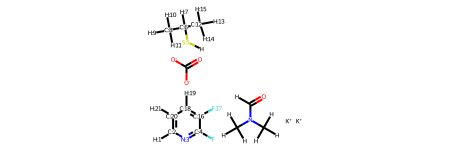

[H:1][c:2]1[n:3][c:4]([S:5][C:6]([H:7])([C:8]([H:9])([H:10])[H:11])[C:12]([H:13])([H:14])[H:15])[c:16]([F:17])[c:18]([H:19])[c:20]1[H:21]


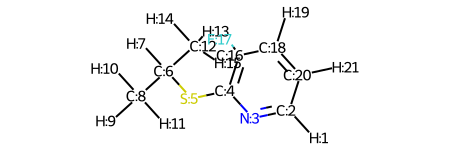

In [4]:
reactions = 'CC(C)S.CN(C)C=O.Fc1cccnc1F.O=C([O-])[O-].[K+].[K+]>>CC(C)Sc1ncccc1F'
print('**********Correct reactants and products******************')
#reactions = treatment(reactions, pre = False, post = False)
display(str_to_mol(reactions.split('>>')[0]))
display(str_to_mol(reactions.split('>>')[1]))
print('************************************************************')
reactions_new = treatment(reactions, pre = True, post = False)
rxns = [reactions_new]
print(rxns)
results = rxn_mapper.get_attention_guided_atom_maps(rxns)
print(results)
reactions_mapped = []
for reaction in results:
    print(type(reaction))
    reaction = treatment(reaction['mapped_rxn'], pre = False, post = True)
    reaction_mapped = reaction.split('>>')
    reactions_mapped.append(reaction_mapped)
for reaction_mapped in reactions_mapped:
    print(reaction_mapped[0])
    display(str_to_mol(reaction_mapped[0]))
    print(reaction_mapped[1])
    display(str_to_mol(reaction_mapped[1]))

### 2. Mapping heavy atoms firstly. Then, mapping Hs

[{'mapped_rxn': '[CH2:1]=[CH:2][O:3][O:4].[CH2:5]=[O:6]>>[C-:5]#[O+:6].[CH2:1]=[CH:2][O:3][OH:4].[H:7]', 'confidence': 0.9584946209855012}]


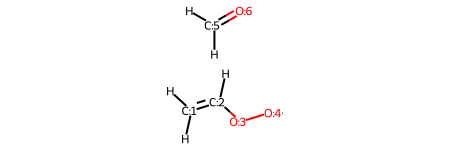

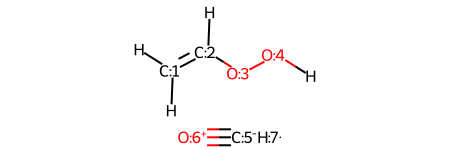

************After Mapping Hs***************
REACTANT(S):


/home/y_liu/predictor/mapper.py:139: UserWarning: Some hydrogen atoms might migrate from/to [H] or [H][H]
  warnings.warn("Some hydrogen atoms might migrate from/to [H] or [H][H]")


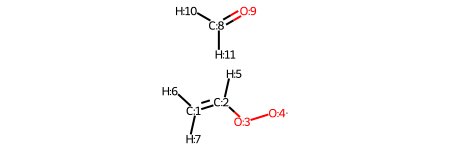

PRODUCT(S):


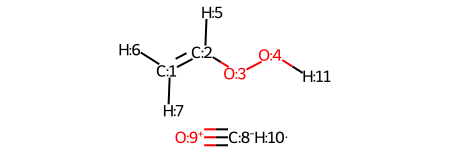

[C:1](=[C:2]([O:3][O:4])[H:5])([H:6])[H:7].[C:8](=[O:9])([H:10])[H:11]
[C-:8]#[O+:9].[C:1](=[C:2]([O:3][O:4][H:11])[H:5])([H:6])[H:7].[H:10]


In [5]:
from mapper import map_reaction_Hs
reactions_test = "C=CO[O].C=O>>C=COO.[C-]#[O+].[H]"
#reactions_test = "C=CO[O].C=O>>C=COO.[C-]#[O+].[H]"
rxns_test = [reactions_test]
reaction_mapped = []
mapped_results = rxn_mapper.get_attention_guided_atom_maps(rxns_test)
print(mapped_results)
rxn = mapped_results[0]['mapped_rxn']
r_smiles, p_smiles = map_reaction_Hs(rxn)
print(r_smiles)
print( p_smiles)

In [6]:
import re
import copy
from mapper import Reorder_AtomMapNum

r_smiles= '[C:1](=[C:2]([O:3][O:4])[H:5])([H:6])[H:7].[C:8](=[O:9])([H:10])[H:11]'
p_smiles='[C-:8]#[O+:9].[C:1](=[C:2]([O:3][O:4][H:11])[H:5])([H:6])[H:7].[H:10]'

r_smiles_new, p_smiles_new = Reorder_AtomMapNum(r_smiles, p_smiles, start_num = 3)
print(r_smiles_new)
print(p_smiles_new)


[C:3](=[C:4]([O:5][O:6])[H:7])([H:8])[H:9].[C:10](=[O:11])([H:12])[H:13]
[C-:10]#[O+:11].[C:3](=[C:4]([O:5][O:6][H:13])[H:7])([H:8])[H:9].[H:12]
